# 3.4 リストの加工
Pythonではデータをリスト型で保持することが多いです。
本節では、リスト型のデータを便利に素早く加工する方法を学びます。

In [1]:
# 一度変数を初期化しておきます「yを押してenterしてください」
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [0]:
# ここは今回おまじないだと思って実行してください。
# A. 今日使うパッケージのインポート
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
from matplotlib.colors import LogNorm
from sklearn import datasets


# B. 実行上問題のないWarningは非表示にする
import warnings
warnings.filterwarnings('ignore')

# C1. Plotを描画できるようにする
%matplotlib inline

# C2. デフォルトのPlotスタイルシートの変更
plt.style.use('ggplot')
plt.rcParams['ytick.color'] = '111111'
plt.rcParams['xtick.color'] = '111111'
plt.rcParams['axes.labelcolor'] = '111111'
plt.rcParams['font.size'] = 15


## 3.4.1 map, ラムダ式, reduce, filter
たくさんのファイルやデータを処理する時、しばしばリストの各要素に対して同じ処理をしたい場合があります。  
その際、Pythonではmap, reduce, filterと呼ばれる便利な関数群を使うことができます。
これらの基本的な使い方は3関数共通で、
```
結果 = 関数名(関数またはラムダ式, リスト)
```
という呼び出し方をします。実際に場面と用法を見ていきましょう。

### map: 同じ処理を繰り返す
mapキーワードは、**リスト中の全ての要素に対して同じ計算を行い**、イテレータを返します。  
range文と同様、帰ってきたイテレータをlist()で囲ってやると、新しいリストを得ることができます。

#### 使用場面：
* ファイル名の一覧に対し、全て拡張子をつける
* 浮動小数点のリストをint関数を使って全て整数にする


**注意：数値を全て2倍するなどの操作なら、numpyの機能を使ったほうが良い**

In [4]:
# xの各要素をint型にしたい

x = [1.1, -2.2, -3.3, 4.4]

# for文の場合
y1 = []  
for i in range(len(x)):
    y1.append(int(x[i]))

    
# mapの場合
y2 =list(map(int, x))

print('x={}'.format(x))
print('y1={}'.format(y1))
print('y2={}'.format(y2))

x=[1.1, -2.2, -3.3, 4.4]
y1=[1, -2, -3, 4]
y2=[1, -2, -3, 4]


このようにmapを使うことで、リストxの各要素に関数操作をひとつずつ適用させることができます。しかし、intやabsとは異なり、関数が定義されていない操作の場合には、自分で関数を作成する必要があります。
関数を宣言する方法にラムダ式があります。


### ラムダ式 (lambda)
ラムダ式はlambdaキーワードを使って、**無名 (名無し) 関数**を書くことができる仕組みです。
map/reduce/filterはいずれも同じ処理を繰り返しおこないますが、簡単な処理 (足し算など) のためにいちいち関数を定義してやるのは面倒な上、わざわざ名前をつけなくとも良い場合が多々あります。  
例えば、変数xの3乗を計算する場合、通常の関数では

In [5]:
def power3(x):
    return x ** 3

print(power3(3))  # -> 27

27


とかいてやる必要がありますが、ラムダ式では
```
lambda 引数: 返り値
```
と書くことで、1行に収めることができます。これから紹介する関数ではラムダ式が非常に便利な役割を果たします。

In [11]:
f = lambda x: x ** 3

print(f(2))

8


これを先ほどのmapと組み合わせると次のような使い方ができます。

In [13]:
# map, lambda
x = [1, -2, -3, 4]
y1 =list(map(power3,x)) # 上で定義した
y2 =list(map(f,x)) # 上で定義した


y3 =list(map(lambda a:a**3 ,x)) # 関数の宣言なしにxの各要素を3乗できた=無名関数

print(x)
print(y1)
print(y2)
print(y3)

[1, -2, -3, 4]
[1, -8, -27, 64]
[1, -8, -27, 64]
[1, -8, -27, 64]


### reduce: 順番に束ねる
reduce関数は、次のような操作を行います：
1. リストの先頭2つをとる
2. 2つの要素に対して処理を行い、処理結果を得る
3. 続いて、得られた処理結果と3番めをとり、処理する要素がなくなるまで繰り返す

#### 使用場面：
* たくさんのリストや文字列を1つに連結する

In [15]:
# Python2では組み込みだったが、Python3でfunctoolsというモジュール内の関数に格下げ
from functools import reduce
# reduce, lambda
x = [1, -2, -3, 10]
y4 = reduce(lambda a, b: a + b, x)  # 次々と要素を足す

print(x)
print(y4)


[1, -2, -3, 10]
6


In [17]:
# 文字列の連結
splitted_strs = ["h", "e", "l", "l", "o"]
string = reduce(lambda a, b: a + b, splitted_strs) # 要素をくっつける
print(string)


hello


### filter: 値を選び出す
filter関数は、**ある条件にしたがってリスト中の値を選び出す**操作を行います。
map関数と同じように、各要素を入力とする関数またはラムダ式を書きますが、そこでTrueを返したものを残し、Falseを返したものを排除します。
#### 使用場面：
* たくさんのリストのうち、長さが0 (空) のものを排除する
* 辞書 (dict) のあるキーについて、ある値を持つ要素を選び出す

**注意：多くの場合、numpyのadvanced indexingを使った方が良い**

In [19]:
# 大きさでフィルタ
data = [1, 2, 4, 8, 2]
filtered_data = list(filter(lambda a: a > 2, data))
print(filtered_data)

# 空リストの削除
data = [[1, 2, 3], [1, 2], [], [3, 4], []]
filtered_data = list(filter(lambda x: len(x) > 0, data))
print(filtered_data)

# 辞書へのフィルタ
# 3つの辞書が入ったリスト
dicts = [{"abc": 1, "def": 2}, {"abc": 3, "def": 4},  {"abc": 5, "def": 6}]

filtered_dicts = list(filter(lambda x: x["abc"] == 3, dicts))
print(filtered_dicts)


[4, 8]
[[1, 2, 3], [1, 2], [3, 4]]
[{'abc': 3, 'def': 4}]


## 練習クイズ
x=[ 21, 34, 35, 46] の各要素を3で割った余りにしたベクトルyを求めよ。(５分)



In [20]:
x = [21, 34, 35, 46]

# WRITE ME!

print(y)

NameError: ignored

## 解答例

In [0]:
# Answer


## 3.5 Advanced Indexing
すでに第1回で、次のような要素の切り出しができることを扱いました：
```
配列[start:end:step,...]
```
要素の切り出しはコピーを伴わないため**高速**である反面、次のような状況では使えませんでした：
* リストの1, 2, 4, 5番目を取り出す (非連続)
* 入力と出力のペアX, y (共にリスト) から、**y == 1**に対応するXを取り出す
* 行列Xの要素のうち、負のものをゼロにする

Numpyでは、Numpyのarrayを複数組み合わせて、自然に上記の操作を書くことができる**advanced indexing**と呼ばれる機能を備えています。  
Numpyのarrayのなかで[・・・]でindexを指定する部分になります。

実際に見てみましょう。

In [0]:
a = np.array([10, 20, 30, 40, 50])
print(a[[0, 1, 3]])  # インデックスに非連続のリストを入れることができる


In [0]:
# 下の2つは等価
print(a[[0, 2]])
print(a[[True, False, True, False, False]])

In [0]:
a = np.array([0, 3, 4, 5])
b = np.array(['BLUE', 'RED', 'RED', 'BLUE'])

print(b == "BLUE")
print(a[b == "BLUE"])

In [0]:
# 一部の要素の書き換え

A = np.array([[3.1, -1.5], [-4.2, 6.7]])
print('A={}'.format(A))
print('A<0={}'.format(A < 0))
A[A < 0] = 0.0 # Aの要素が負のものを0にする
print('A_plus={}'.format(A))   # 負の値だけを0にできた！


### Advanced indexingの注意点
Advanced indexingは便利な反面、通常の切り出しよりかなり遅いため、濫用は避けましょう。

参考：https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html

### 練習クイズ

x = [10, 20, 40, 60, 50], y = [1, 0, 1, 1, 0]
において、
yの要素が1である要素番号のxの総和を求めよ。

In [0]:
x = np.array([10, 20, 40, 60, 50])
y = np.array([1, 0, 1, 1, 0])

# WRITE ME! answer=110


## 解答例

In [0]:
# Answer


## 3.6 IrisデータでAdvanced Indexingとヒストグラムの練習
有名なirisのデータを用いて、種類ごとの分布を求めます。


In [0]:
from sklearn import datasets
iris = datasets.load_iris()

In [28]:
# 名前の種類をチェックしましょう
iris.target_names


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [29]:
# 変数名を調べましょう
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [30]:
X = iris.data[:, 0] # 今回は0列目のsepal lengthのみを使用します
type(X)

numpy.ndarray

In [31]:
# 種類を変数で取得します
Y = iris.target
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


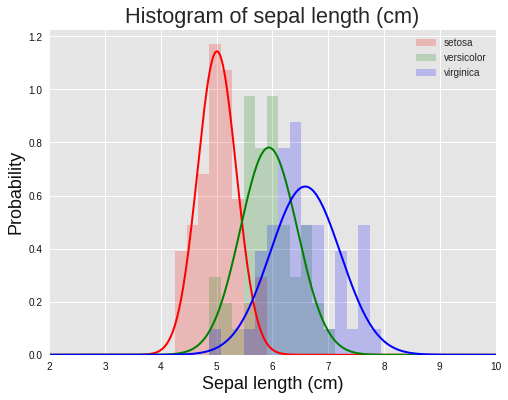

In [26]:
# このセルでやっていることをチーム内で理解してください。

# 描画前の設定
labels = iris.target_names
colors = ['r', 'g', 'b']
n_classes = 3

# 描画
plt.figure(figsize=(8, 6))
plt.title("Histogram of sepal length (cm)")
bins = np.linspace(2, 10, 40)  # 2〜10を40分割

for cls in range(n_classes):
    X_c = X[Y == cls]  # Advanced indexing
    color = colors[cls]
    label = labels[cls]

    plt.hist(X_c, bins=bins, alpha=0.2, color=color, normed=True, label=label)
    # alphaは不透明度

    mu = np.mean(X_c)
    sigma = np.var(X_c)

    x = np.linspace(-2, 10, 500)
    y = np.exp(-((x - mu) ** 2) / (2 * sigma)) / np.sqrt(2 * np.pi * sigma)
    plt.plot(x, y, linewidth=2, color=color)

plt.xlim(2, 10)
plt.xlabel('Sepal length (cm)')
plt.ylabel('Probability')
plt.legend(loc="upper right")  # loc引数を指定することで、凡例の出現位置を制御できる
plt.show()



## 実践演習3.2 The Allen Mouse Brain Connectivity Atlasの結合成分の算出

講義解説の通り、The Allen Mouse Brain Connectivity Atlasでは、注入部(injection)と射影部(projection)の体積を計算し、ある領野からどの領野に注入した蛍光成分が移動したかに基づいて領野間の結合の強さを測定している。

     x_{ij} ：実験iの領野jに対する注入量
     y_{ik} ：実験iの領野kにおける射影量
     w_{jk} ：領野jから領野kに対する結合強度

としたとき、注入量・射影量から領野$k$にprojectionする結合強度を計算する方法として、 $$ L = \min_{w_{jk} \ge 0} \sum_{i=1}^{N_i} ( \sum_{j=1}^{N_j} w_{jk} x_{ij} - y_{ik} )^2 $$ を最小化する非負制約線形回帰問題を考えることができる (Natureの実際の論文では非負制約ロバスト回帰を行っているが、講義の範囲を超えるので扱わない)。

重み制約付き線形回帰問題は解析的には解けないため、今回はscipy.optimize.nnls (non-negative least squares solver)を用いる。nnls(A, b)は方程式$Aw=b$の非負制約付きの解を返す。

課題：

    データに対して非負制約線形回帰を行い、領野間の結合を推定しています。書かれているコードをチームで理解してください。




### Yの作成
各射影先$y_k (k=1, 2,...)$について、個別に線形回帰問題をときます。そのために、各行に1実験ごとのinjection量が入った行列$X$と、各行に1実験ごとのprojection量が入った行列$y$が必要になります。

In [32]:
import os


!wget "https://drive.google.com/uc?export=download&id=1IYtukE_7qeNd6WEKO_a1LJJCwtDALZPA" -O data_mouse.zip

!unzip -o data_mouse.zip

--2018-01-20 07:15:57--  https://drive.google.com/uc?export=download&id=1IYtukE_7qeNd6WEKO_a1LJJCwtDALZPA
Resolving drive.google.com (drive.google.com)... 74.125.141.102, 74.125.141.101, 74.125.141.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.141.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-18-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/gae99fhkhh9p9ekq18g1ih41mld7ltdj/1516428000000/06190430902934159529/*/1IYtukE_7qeNd6WEKO_a1LJJCwtDALZPA?e=download [following]
--2018-01-20 07:15:57--  https://doc-00-18-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/gae99fhkhh9p9ekq18g1ih41mld7ltdj/1516428000000/06190430902934159529/*/1IYtukE_7qeNd6WEKO_a1LJJCwtDALZPA?e=download
Resolving doc-00-18-docs.googleusercontent.com (doc-00-18-docs.googleusercontent.com)... 74.125.141.132, 2607:f8b0:400c:c06::84
Connecting to doc-00-18-docs.googleusercontent.com (doc-00

In [0]:
# 注意：元のファイルは23からindexとらないといけないのを24からにして、1つ減っている
# target：注入されたあと、出現した場所と量の情報(outcome：結果)を目的変数Yとして整理
Y = []
with open("data_mouse/target_data.csv") as f:
    for idx, line in enumerate(f): # enumerateはindexと要素を引き出す
        line = line.strip("\n") # 行の最後の改行を消す
        if idx ==0: #0行目、Pythonは0から始めるので、csvとしては1行目、この行はindexなので無視
            continue; 
        elif idx == 1: # 1行目、部位の名称を取り出す
            # カンマで区切ってリストにする
            projection_names = line.split(",")[1:] # 0列目は実験IDなので、1列目から取得 

        elif idx == 2: # 2行目、半球の位置 L or R
            hemisphere = line.split(",")[1:]
            projection_names = list(map(lambda a,b: a + '_' +b, projection_names, hemisphere))
        else: # 3行目以降でデータが格納されている
            data = line.split(",")[1:]
            Y.append(list(map(float, data[:])))

Y = np.array(Y) # Yはリストオブジェクトなので、Numpyに変換する

In [34]:
# pandasでYの中身をチェックする
import pandas as pd
pd.DataFrame(Y)

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,139
0,3.171548e-02,4.559962e-03,1.149009e-02,3.239794e-03,0.003883,3.436327e-02,2.165608e-03,8.972408e-03,1.831670e-03,2.848176e-03,...,9.871231e-03,1.311638e-02,2.817549e-03,3.305318e-01,7.658792e-02,9.810272e-02,8.159216e-03,8.496226e-02,5.086524e-02,1.185443e-02
1,2.476784e-04,1.437306e-04,1.891581e-05,1.760858e-05,0.000060,1.724618e-03,5.998431e-05,3.794247e-04,2.097857e-05,2.821828e-05,...,7.160740e-03,6.830340e-03,1.938531e-03,1.165723e-01,1.458556e-02,3.623276e-02,4.404449e-03,3.845243e-02,1.944468e-02,3.452460e-03
2,3.575331e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.597220e-05,0.000000e+00,0.000000e+00,4.207372e-08,0.000000e+00,...,6.317378e-07,1.188165e-04,2.390078e-05,3.106481e-06,2.265040e-06,0.000000e+00,0.000000e+00,0.000000e+00,8.414416e-07,0.000000e+00
3,5.370456e-03,3.252999e-05,1.943802e-03,8.927999e-04,0.000123,9.505471e-04,3.457820e-04,7.357002e-05,4.546432e-05,6.326728e-05,...,3.266592e-05,1.679070e-04,4.030428e-05,4.039231e-03,1.030024e-03,1.130106e-03,1.647629e-05,8.144447e-04,7.584895e-04,2.896902e-04
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2.839070e-05,0.000000e+00,1.552147e-05,0.000000e+00,8.291621e-06,...,0.000000e+00,9.103537e-09,0.000000e+00,7.465404e-06,7.465404e-06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5,2.892282e-02,6.919910e-04,2.841540e-03,9.872870e-04,0.000255,1.495527e-02,7.794635e-03,3.447580e-03,5.017830e-03,6.470316e-03,...,3.945908e-04,2.340527e-03,8.062586e-04,4.959738e-02,1.611056e-02,8.535614e-03,3.110358e-05,1.403751e-02,9.240112e-03,1.642488e-03
6,2.770833e-03,2.088082e-05,3.390503e-04,1.484243e-04,0.000257,1.775780e-03,1.178000e-03,4.198708e-06,8.091123e-04,2.325041e-06,...,1.572685e-03,1.257893e-03,1.407067e-04,1.482436e-02,1.331179e-03,2.714237e-03,1.825475e-06,5.730318e-03,4.070227e-03,9.765688e-04
7,1.094977e-04,4.415177e-05,8.174180e-06,4.018274e-06,0.000000,1.583393e-04,2.499036e-05,8.561768e-05,6.213443e-06,1.402579e-05,...,1.504176e-05,1.375035e-06,1.982552e-05,1.265592e-03,3.203057e-04,3.004697e-04,5.849328e-06,3.742042e-04,1.622393e-04,1.025237e-04
8,5.959357e-03,2.495611e-04,1.811427e-03,3.149271e-04,0.000760,1.366068e-02,1.876562e-03,4.305935e-03,1.541144e-04,1.445394e-03,...,7.182393e-02,6.071110e-02,9.196116e-03,6.085519e-02,1.776929e-02,1.162775e-02,3.279633e-04,1.592520e-02,1.332769e-02,1.877288e-03
9,2.346002e-06,0.000000e+00,1.227003e-06,2.462653e-06,0.000004,1.781442e-05,4.287809e-06,2.777705e-06,1.410335e-08,6.978933e-07,...,8.115316e-07,7.503736e-05,1.010132e-05,2.436023e-05,2.249877e-05,1.839303e-06,0.000000e+00,0.000000e+00,0.000000e+00,2.215557e-08


### Xの作成1
Xを作成するにあたり、注入部位の名前の一覧と、それらが重み行列のどの列に対応するかを決めなければなりません。そこでまず前処理として、入力領域名 (area_names)の一覧をcsvより取得します。

In [35]:
# injection：注入した部位と量の情報(income：原因)を説明変数Xとして整理
# まず注入した部位の辞書を作成する

injection_area_names = []
with open("data_mouse/injected_data.csv") as f:
    for idx, line in enumerate(f):
        if idx >= 1: # python1行目から情報が入っている
            line = line.strip("\n") # 行の最後の改行を消す
            strs = line.split(",") # カンマで区切ってリストstrsにする
            # 各行について、記載されている領野名 (最大6つ) をarea_namesに追加 (空文字は追加しないこと)
            for i in range(1, len(strs), 3): # 2列目から3つとばしで、21列目まで
                if strs[i] != "": 
                    injection_area_names.append(strs[i])

unique_injection_area_names = np.unique(injection_area_names) # 重複をなくしたリストにする

# 辞書型に変換する
injection_area_dic = dict(zip(unique_injection_area_names, range(len(unique_injection_area_names))))
print(injection_area_dic)  # 領野名から列インデックスへ変換する辞書

{'AAA': 0, 'ACAd': 1, 'ACAv': 2, 'ACB': 3, 'AD': 4, 'ADP': 5, 'AHN': 6, 'AId': 7, 'AIp': 8, 'AIv': 9, 'AM': 10, 'AMB': 11, 'AN': 12, 'AOB': 13, 'AON': 14, 'APN': 15, 'ARH': 16, 'ASO': 17, 'AT': 18, 'AUDd': 19, 'AUDp': 20, 'AUDpo': 21, 'AUDv': 22, 'AV': 23, 'AVP': 24, 'AVPV': 25, 'B': 26, 'BA': 27, 'BAC': 28, 'BLA': 29, 'BMA': 30, 'BST': 31, 'CA1': 32, 'CA2': 33, 'CA3': 34, 'CEA': 35, 'CENT': 36, 'CL': 37, 'CLA': 38, 'CLI': 39, 'CM': 40, 'COAa': 41, 'COAp': 42, 'COPY': 43, 'CP': 44, 'CS': 45, 'CU': 46, 'CUL': 47, 'CUN': 48, 'DCO': 49, 'DEC': 50, 'DG': 51, 'DMH': 52, 'DMX': 53, 'DN': 54, 'DP': 55, 'DR': 56, 'DTN': 57, 'ECT': 58, 'ENTl': 59, 'ENTm': 60, 'EPd': 61, 'EPv': 62, 'EW': 63, 'FL': 64, 'FN': 65, 'FOTU': 66, 'FRP': 67, 'FS': 68, 'GPe': 69, 'GPi': 70, 'GR': 71, 'GRN': 72, 'GU': 73, 'IA': 74, 'IAD': 75, 'IAM': 76, 'IC': 77, 'IF': 78, 'IG': 79, 'IGL': 80, 'III': 81, 'ILA': 82, 'IMD': 83, 'IO': 84, 'IP': 85, 'IPN': 86, 'IRN': 87, 'ISN': 88, 'IV': 89, 'LA': 90, 'LAV': 91, 'LC': 92, 'LD

### Xの作成2
各行に1実験ごとのinjection量が入った行列$X$を作成します。

In [0]:
# injection：注入した場所と量の情報(income：原因)を説明変数Xとして整理
# Xを作成する
X=[]

with open("data_mouse/injected_data.csv") as f:
    for idx, line in enumerate(f):
        if idx >= 1: # python1行目から情報が入っている
            line = line.strip("\n") # 行の最後の改行を消す
            strs = line.split(",") # カンマで区切ってリストstrsにする
            
            x = np.zeros(len(injection_area_dic)) # 0のベクトルを作成

            # 各行から注入量を持ってくる
            for i in range(1, len(strs), 3):
                if strs[i] != "":
                    index =injection_area_dic[strs[i]] # 注入部位名のindex
                    amount = float(strs[i+2])  # 注入量
                    x[index] = amount

            X.append(x)

X = np.array(X) # Xをnumpyに変換する

In [37]:
# pandasでXの中身をチェックする
import pandas as pd
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,268,269,270,271,272,273,274,275,276,277
0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.016239,0.211449,0.000000,...,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.174496,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.353084,0.000000,...,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0
5,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.035004,0.0,0.0
6,0.0,0.000000,0.032429,0.111085,0.0,0.031936,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0
7,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.056214,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0
8,0.0,0.010124,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0
9,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.000000,0.0,0.0


### 線形回帰の実行
各射影先$y_k (k=1, 2,...)$について、個別に線形回帰問題をときます。

In [38]:
# target領域の各列ごとに線形回帰を実施する
import scipy
weights = np.zeros((X.shape[1], Y.shape[1])) # shpae[1]は列数
total_error = 0
for cls in range(Y.shape[1]):
    # WRITE ME!
    # nnlsを使って、あるprojectionに対する線形回帰の結果としてtheta, errorを得る
    theta, error = scipy.optimize.nnls(X, Y[:, cls])
    weights[:, cls] = theta
    total_error += error

np.set_printoptions(precision=3)
print("予測誤差: {}".format(total_error))

print("結合の最大値：{}、最小値：{}、平均値：{}、ゼロ値：{}/{}".format(weights.max(), weights.min(), np.mean(weights), np.sum(weights == 0), weights.size))

予測誤差: 13.890282157323174
結合の最大値：18.850819966405062、最小値：0.0、平均値：0.012382033334613397、ゼロ値：29092/38920


In [39]:
# pandasでWの中身をチェックする
pd.DataFrame(weights)

,0,1,2,3,4,5,6,7,8,9,...,130,131,132,133,134,135,136,137,138,139
0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000009,0.002268,0.000000,0.000000,0.000000e+00,0.004261,0.000265,1.280109e-04
1,1.310379e-02,9.211719e-04,2.501812e-03,3.989447e-04,1.484657e-03,2.760720e-02,0.005715,0.003781,5.160703e-05,9.699182e-03,...,0.068736,0.086099,0.017430,0.166162,0.053254,0.037485,7.371395e-04,0.039157,0.031579,4.051873e-03
2,0.000000e+00,4.008984e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,3.930465e-04,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
3,2.150041e-04,0.000000e+00,2.189652e-05,1.278801e-05,4.064601e-06,7.572946e-05,0.000105,0.000002,2.562494e-05,4.062410e-06,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
4,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,1.338469e-03
5,2.255838e-03,0.000000e+00,2.952454e-04,1.123806e-04,0.000000e+00,1.559970e-03,0.000939,0.000125,0.000000e+00,3.310427e-04,...,0.000000,0.000000,0.000000,0.000000,0.001193,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
6,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
7,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
8,0.000000e+00,9.072318e-05,0.000000e+00,0.000000e+00,0.000000e+00,2.048468e-03,0.000000,0.000104,1.168344e-04,0.000000e+00,...,0.001372,0.000649,0.000000,0.035192,0.002719,0.010773,9.300781e-04,0.009767,0.005679,1.365655e-03
9,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.001475,0.000000e+00,0.000000,0.000000,0.000000e+00


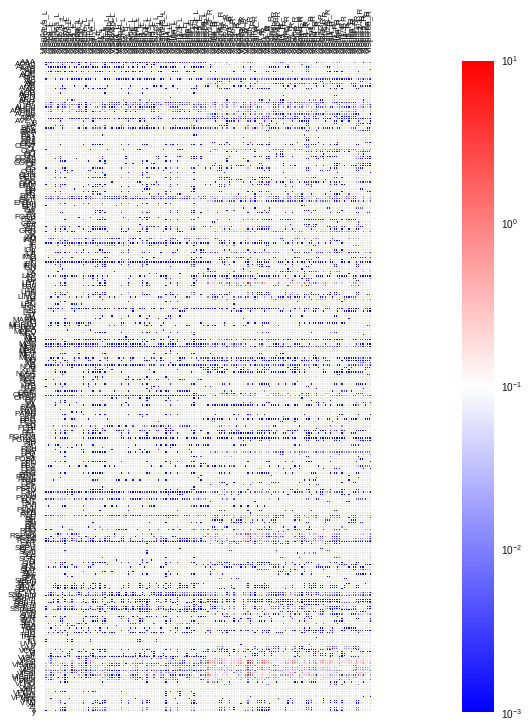

In [40]:
# 重みを可視化（このセルは理解する必要はありません。描画しているだけです）
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig = plt.figure(figsize=(32, 12))
ax = fig.add_subplot(111)
cax = ax.matshow(weights, cmap="bwr", norm=LogNorm(vmin=0.001, vmax=10))
ax.set_xticks(range(weights.shape[1]))
ax.set_xticklabels(projection_names, rotation='vertical', fontsize=8)
ax.set_yticks(range(weights.shape[0]))
ax.set_yticklabels(unique_injection_area_names, fontsize=8)
plt.colorbar(cax)
plt.show()

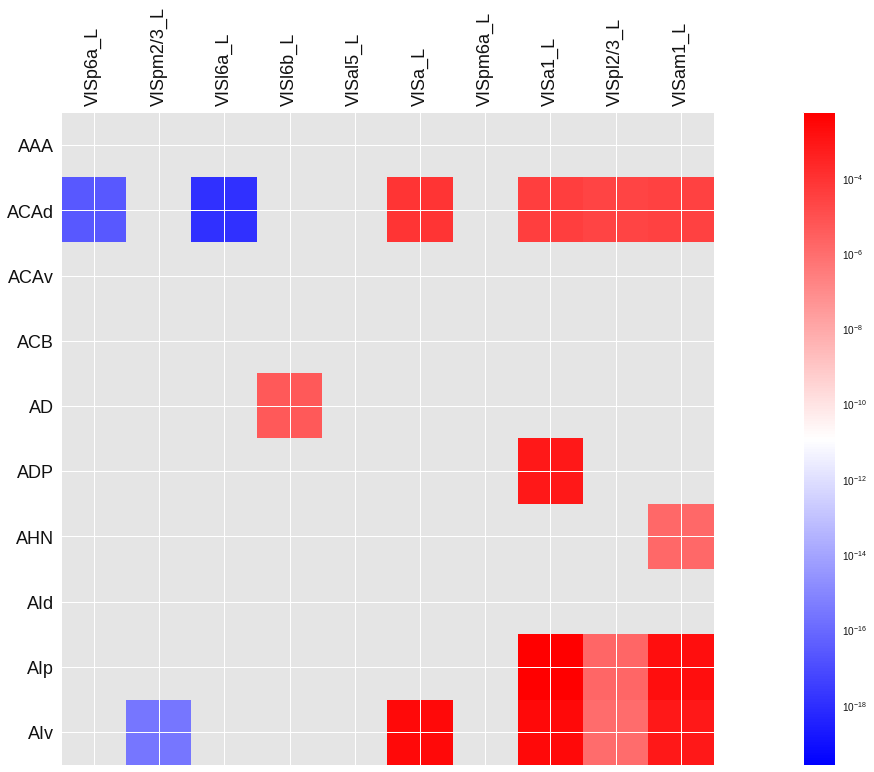

In [41]:
# 左下の部分を拡大（このセルは理解する必要はありません。描画しているだけです）
from mpl_toolkits.axes_grid1 import make_axes_locatable
fig = plt.figure(figsize=(32, 12))
ax = fig.add_subplot(111)
cax = ax.matshow(weights[-10:,0:10], cmap="bwr", norm=LogNorm())
ax.set_xticks(range(10))
ax.set_xticklabels(projection_names[0:10], rotation='vertical', fontsize=18)
ax.set_yticks(range(10))
ax.set_yticklabels(unique_injection_area_names[0:10], fontsize=18)
plt.colorbar(cax)
plt.show()

NameError: ignored